<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 139.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 156.1 MB/s eta 0:00:00


In [2]:
!pip install numpy

In [3]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 137.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 157.2 MB/s eta 0:00:00


In [4]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [5]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-10 13:27:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  49.6MB/s    in 3.1s    

2025-07-10 13:27:39 (49.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import numpy as np

### Load the data


In [7]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [8]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



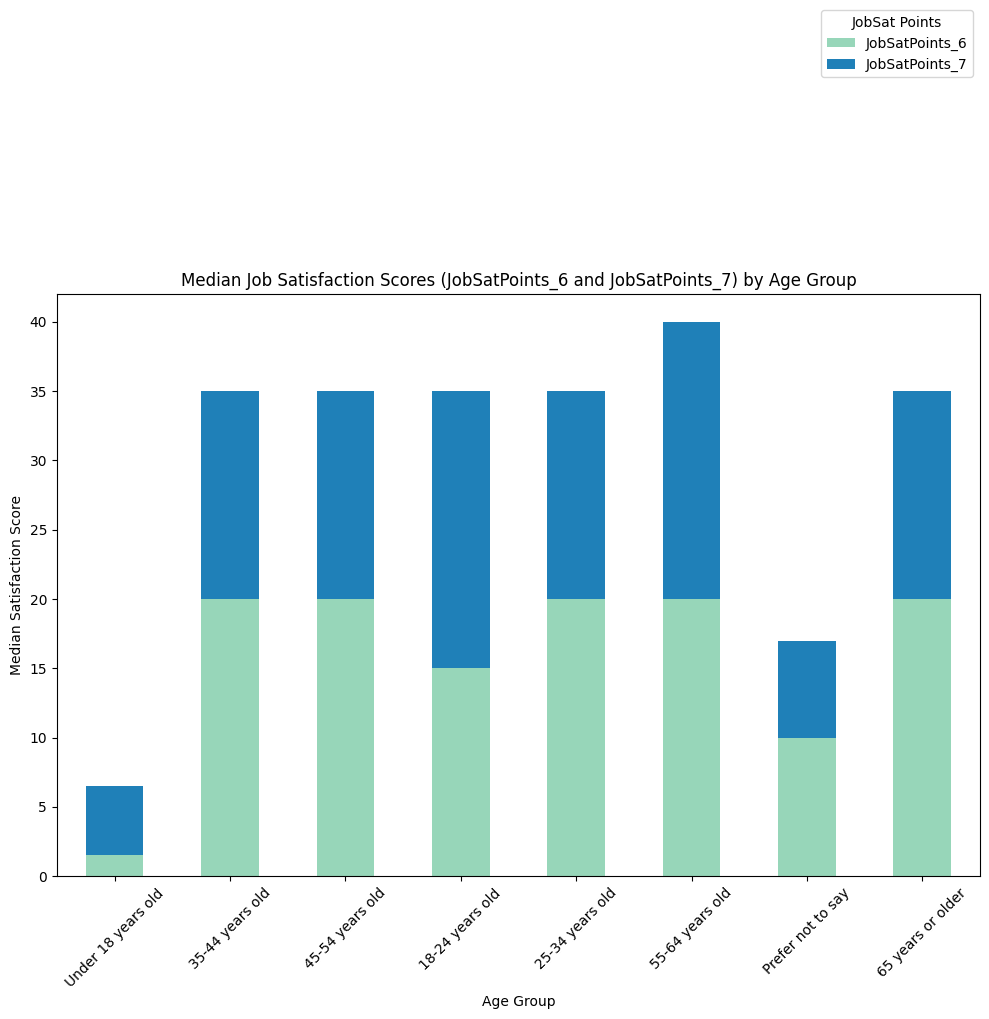

In [9]:
df_filtered = df.dropna(subset=['JobSatPoints_6','JobSatPoints_7','Age']).copy()

# group by age

# Define age group order if you want a specific sorting
age_order = ['Under 18 years old',
             '35-44 years old',
             '45-54 years old',
             '18-24 years old',
             '25-34 years old',
             '55-64 years old',
             'Prefer not to say',
             '65 years or older']

df_filtered['AgeGroup'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Group by age group and compute median satisfaction scores
median_satisfaction = df_filtered.groupby('AgeGroup',observed=False)[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort age groups
median_satisfaction = median_satisfaction.sort_index()


colors = sns.color_palette("YlGnBu", n_colors=2)
# Plot a stacked bar chart

median_satisfaction.plot(kind='bar', color=colors, stacked=True, figsize=(10, 12))

# Add chart title and labels
plt.title('Median Job Satisfaction Scores (JobSatPoints_6 and JobSatPoints_7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.legend(title='JobSat Points',bbox_to_anchor=(1, 1.5),loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [10]:
def simplify_employment_first(status):
    if pd.isna(status):
        return "Other / Mixed"
    
    first_part = status.split(";")[0].strip().lower()

    if "prefer not to say" in first_part:
        return "Prefer not to say"
    if "employed, full-time" in first_part:
        return "Employed full-time"
    if "employed, part-time" in first_part:
        return "Employed part-time"
    if "independent contractor" in first_part or "self-employed" in first_part:
        return "Self-employed / Freelancer"
    if "student" in first_part:
        return "Student"
    if "not employed, but looking for work" in first_part:
        return "Unemployed – Looking"
    if "not employed, and not looking for work" in first_part:
        return "Unemployed – Not looking"
    if "retired" in first_part:
        return "Retired"
    return "Other / Mixed"

# Apply function
df['Employment_Simple'] = df['Employment'].apply(simplify_employment_first)

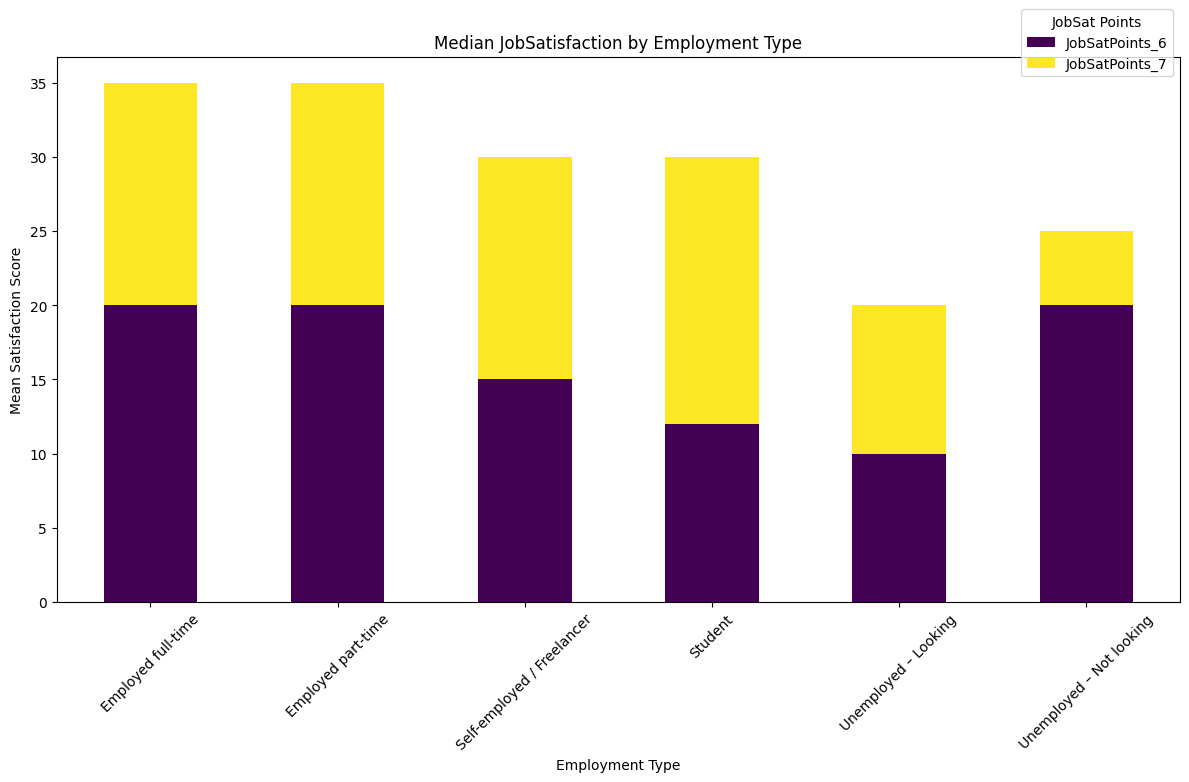

In [11]:
#drop na values
df_filtered = df.dropna(subset=['Employment_Simple', 'JobSatPoints_6', 'JobSatPoints_7'])

Employment_JobSat=df_filtered.groupby('Employment_Simple')[['JobSatPoints_6','JobSatPoints_7']].median()


#plotting
Employment_JobSat.plot(kind='bar', colormap='viridis', stacked=True, figsize=(12, 8) )

plt.title('Median JobSatisfaction by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Mean Satisfaction Score')
plt.legend(title='JobSat Points',bbox_to_anchor=(1, 1.1),loc='upper right')
plt.xticks(rotation=45)

plt.tight_layout()
# Show the plot
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


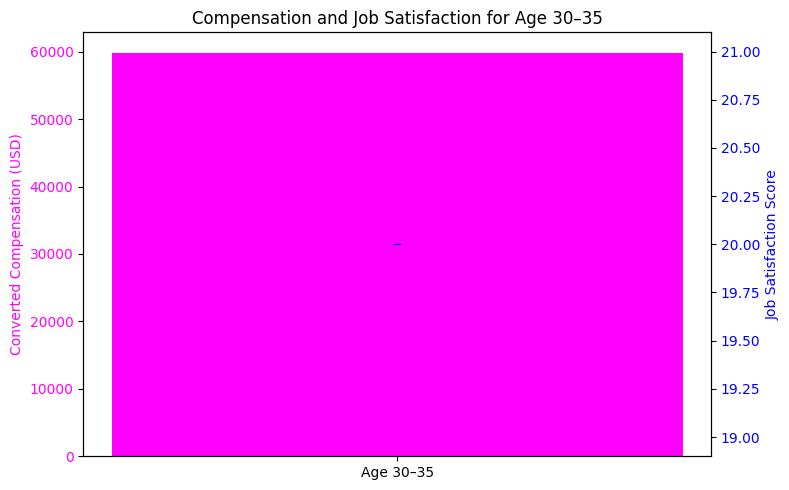

In [12]:
# Filter to age 30–35
df_filtered = df[(df['Age']=='25-34 years old')]
# Drop rows with missing values
df_filtered = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

#median across the whole 30–35 group
median_values = df_filtered[['ConvertedCompYearly', 'JobSatPoints_6']].median()



# Use raw median values
plot_data = pd.DataFrame({
    'ConvertedCompYearly': [median_values['ConvertedCompYearly']],
    'JobSatPoints_6': [median_values['JobSatPoints_6']]
})

# Create figure and twin axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot bar for compensation
ax1.bar(x=['Age 30–35'], height=plot_data['ConvertedCompYearly'], color='magenta', label='Compensation')
ax1.set_ylabel('Converted Compensation (USD)', color='magenta')
ax1.tick_params(axis='y', labelcolor='magenta')

# Plot line for satisfaction on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(['Age 30–35'], plot_data['JobSatPoints_6'], marker='_', color='blue', linewidth=2, label='Job Satisfaction')
ax2.set_ylabel('Job Satisfaction Score', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and layout
plt.title('Compensation and Job Satisfaction for Age 30–35')
fig.tight_layout()
plt.show()

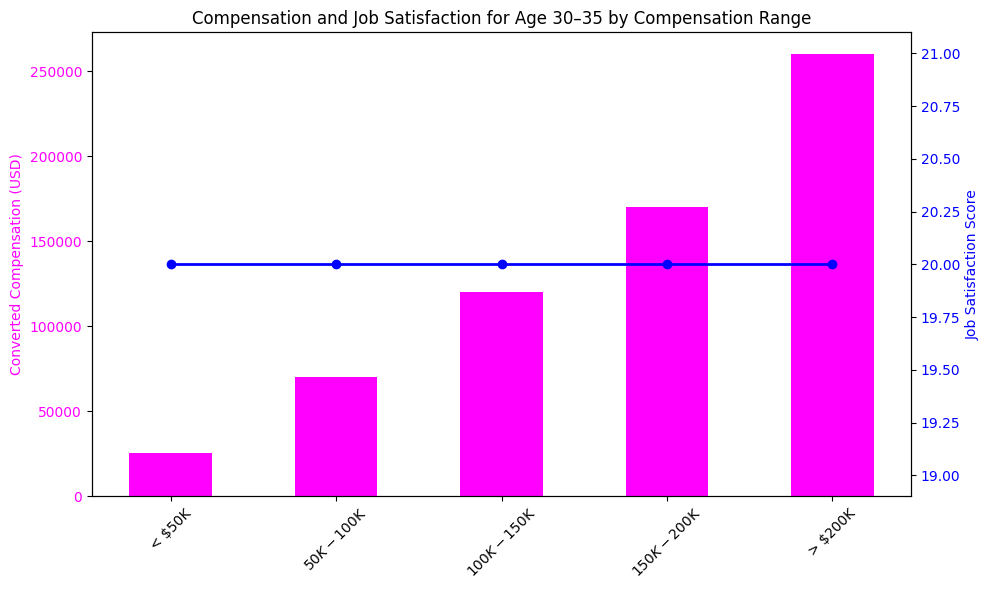

In [13]:

# Convert the 'Age' column to numeric values for grouping
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 32, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter the data for respondents aged 30-35
age_filtered_df = df[(df['AgeNum'] >= 30) & (df['AgeNum'] <= 35)]

# Filter out rows with missing values in 'ConvertedCompYearly' and 'JobSatPoints_6'
age_filtered_df = age_filtered_df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Group the ConvertedCompYearly column into compensation ranges
compensation_bins = [0, 50000, 100000, 150000, 200000, np.inf]
compensation_labels = ['< $50K', '$50K-$100K', '$100K-$150K', '$150K-$200K', '> $200K']
age_filtered_df['CompensationRange'] = pd.cut(age_filtered_df['ConvertedCompYearly'], bins=compensation_bins, labels=compensation_labels)

# Calculate the median job satisfaction scores and compensation for each range
grouped_data = age_filtered_df.groupby('CompensationRange', observed=False)[['ConvertedCompYearly', 'JobSatPoints_6']].median()
# Define bar width and x positions
bar_width = 0.5
x = np.arange(len(grouped_data))
comp_labels = grouped_data.index.astype(str)

# Create figure and twin axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for median compensation
bars = ax1.bar(x, grouped_data['ConvertedCompYearly'], color='magenta', width=bar_width, label='Compensation')
ax1.set_ylabel('Converted Compensation (USD)', color='magenta')
ax1.tick_params(axis='y', labelcolor='magenta')

# Line plot for median job satisfaction (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(x, grouped_data['JobSatPoints_6'], color='blue', marker='o', linewidth=2, label='Job Satisfaction')
ax2.set_ylabel('Job Satisfaction Score', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# X-axis labels and formatting
ax1.set_xticks(x)
ax1.set_xticklabels(comp_labels, rotation=45)
plt.title('Compensation and Job Satisfaction for Age 30–35 by Compensation Range')
fig.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


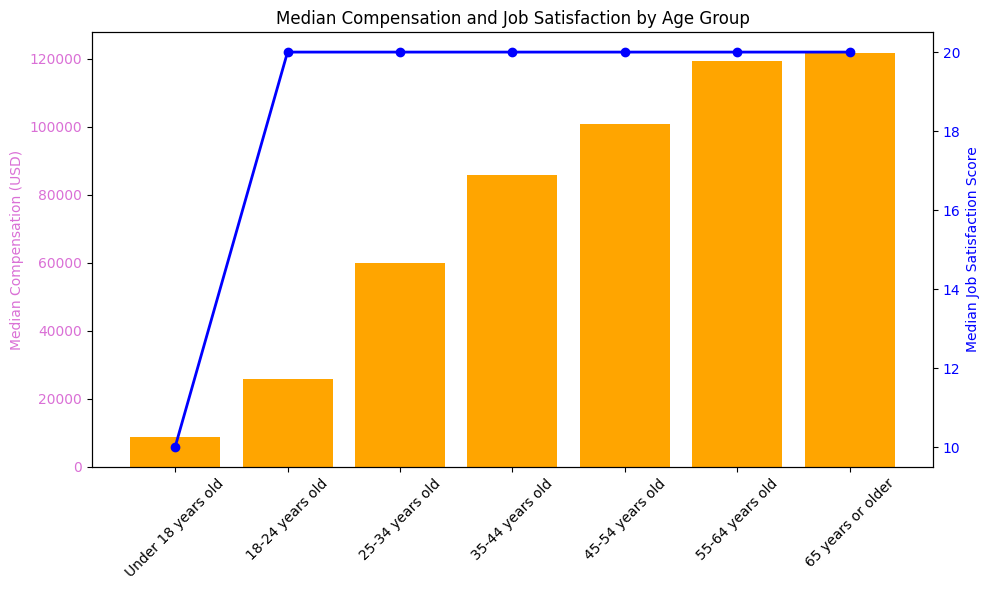

In [14]:
# Step 1: Map age to numeric midpoint for sorting
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', 
    '65 years or older'
]

df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Step 2: Drop missing values
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Step 3: Group by age and calculate medians
grouped = df_filtered.groupby('Age', observed=False)[['ConvertedCompYearly', 'JobSatPoints_6']].median().dropna()

# Step 4: Plot — dual-axis with bar and line
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar for median compensation
bars = ax1.bar(grouped.index, grouped['ConvertedCompYearly'], color='orange', label='Median Compensation')
ax1.set_ylabel('Median Compensation (USD)', color='orchid')
ax1.tick_params(axis='y', labelcolor='orchid')

# Line for job satisfaction
ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['JobSatPoints_6'], color='blue', marker='o', linewidth=2, label='Median Job Satisfaction')
ax2.set_ylabel('Median Job Satisfaction Score', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Format
plt.title('Median Compensation and Job Satisfaction by Age Group')
ax1.set_xticks(range(len(grouped.index)))
ax1.set_xticklabels(grouped.index, rotation=45)
fig.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


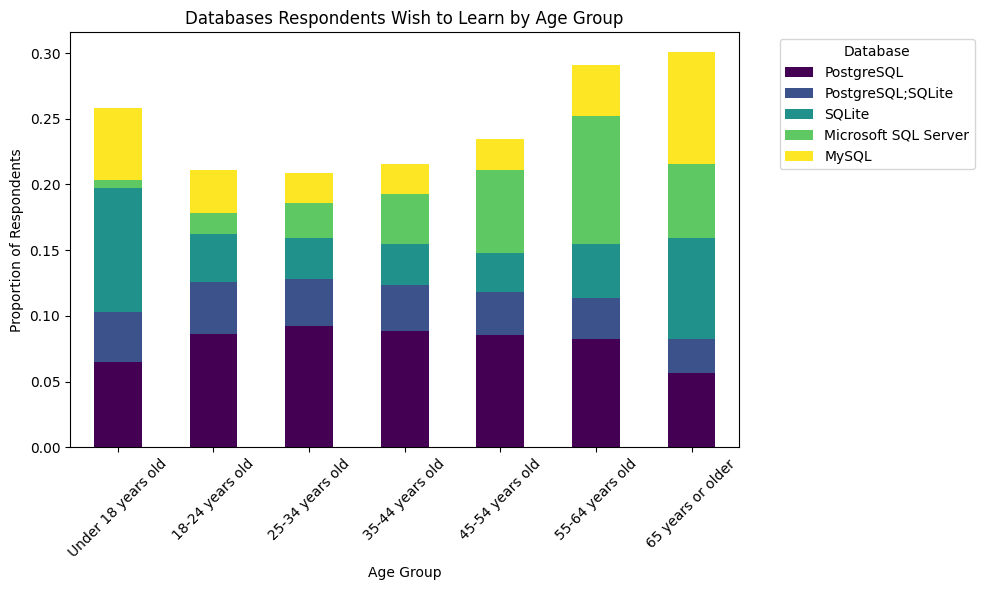

In [15]:
# Cleaned list of age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

#Filter 
df_filtered = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# Normalize age as categorical
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

#Expand multiple database choices into individual rows
df_expanded = df_filtered.assign(Database=df_filtered['DatabaseWantToWorkWith'].str.split(',')).explode('Database')
df_expanded['Database'] = df_expanded['Database'].str.strip()

# Step 3: Count database preferences per age group
database_counts = df_expanded.groupby(['Age', 'Database'], observed=False).size().unstack(fill_value=0)

# Step 4: Convert counts to proportions (row-wise normalization)
database_props = database_counts.div(database_counts.sum(axis=1), axis=0)

# Optional: focus on top N most common databases
top_databases = df_expanded['Database'].value_counts().nlargest(5).index
database_props = database_props[top_databases]

# Step 5: Plot as 100% stacked bar chart
database_props.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels
plt.title('Databases Respondents Wish to Learn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


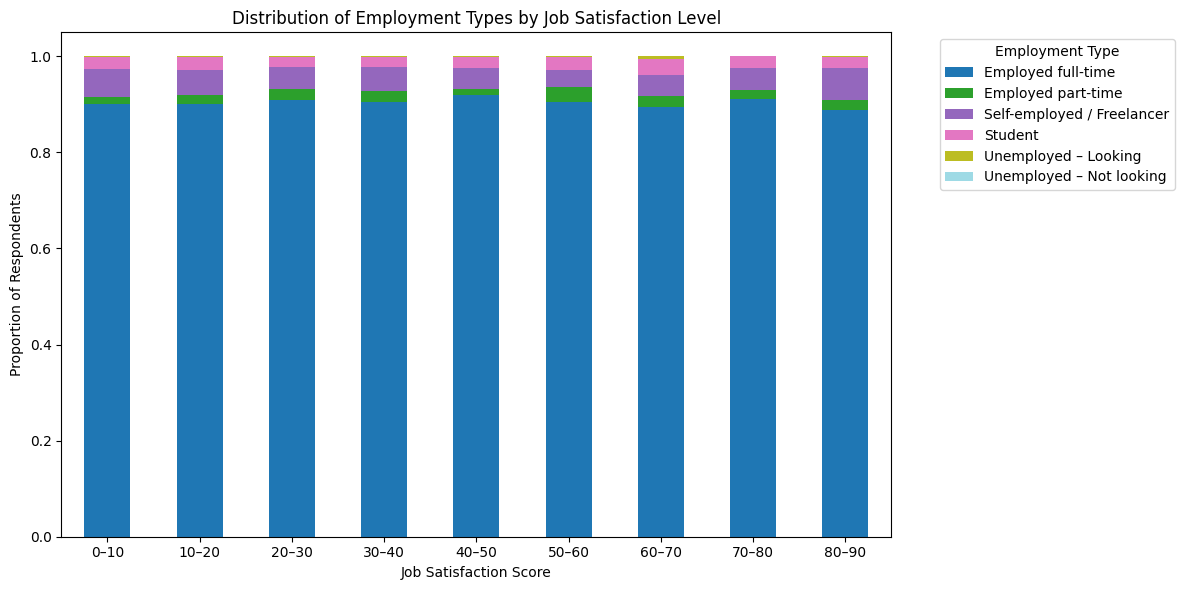

In [16]:
# 1. Filter relevant columns and drop missing values
df_filtered = df.dropna(subset=['JobSatPoints_6', 'Employment_Simple']).copy()

# Define bins: 0 to 1000 in steps of 10
bins = np.arange(0, 100, 10)

# Create bin labels like '0–10', '11–20', ...
labels = [f"{bins[i]}–{bins[i+1]}" for i in range(len(bins)-1)]

# Cut into bins
s_binned = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels)


# 3. Create cross-tab: counts of employment types per satisfaction level
employment_dist = pd.crosstab(s_binned, df_filtered['Employment_Simple'])

# 4. Normalize row-wise to get proportions
employment_props = employment_dist.div(employment_dist.sum(axis=1), axis=0)

# 5. Plot
ax = employment_props.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        colormap='tab20'
)

plt.title('Distribution of Employment Types by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


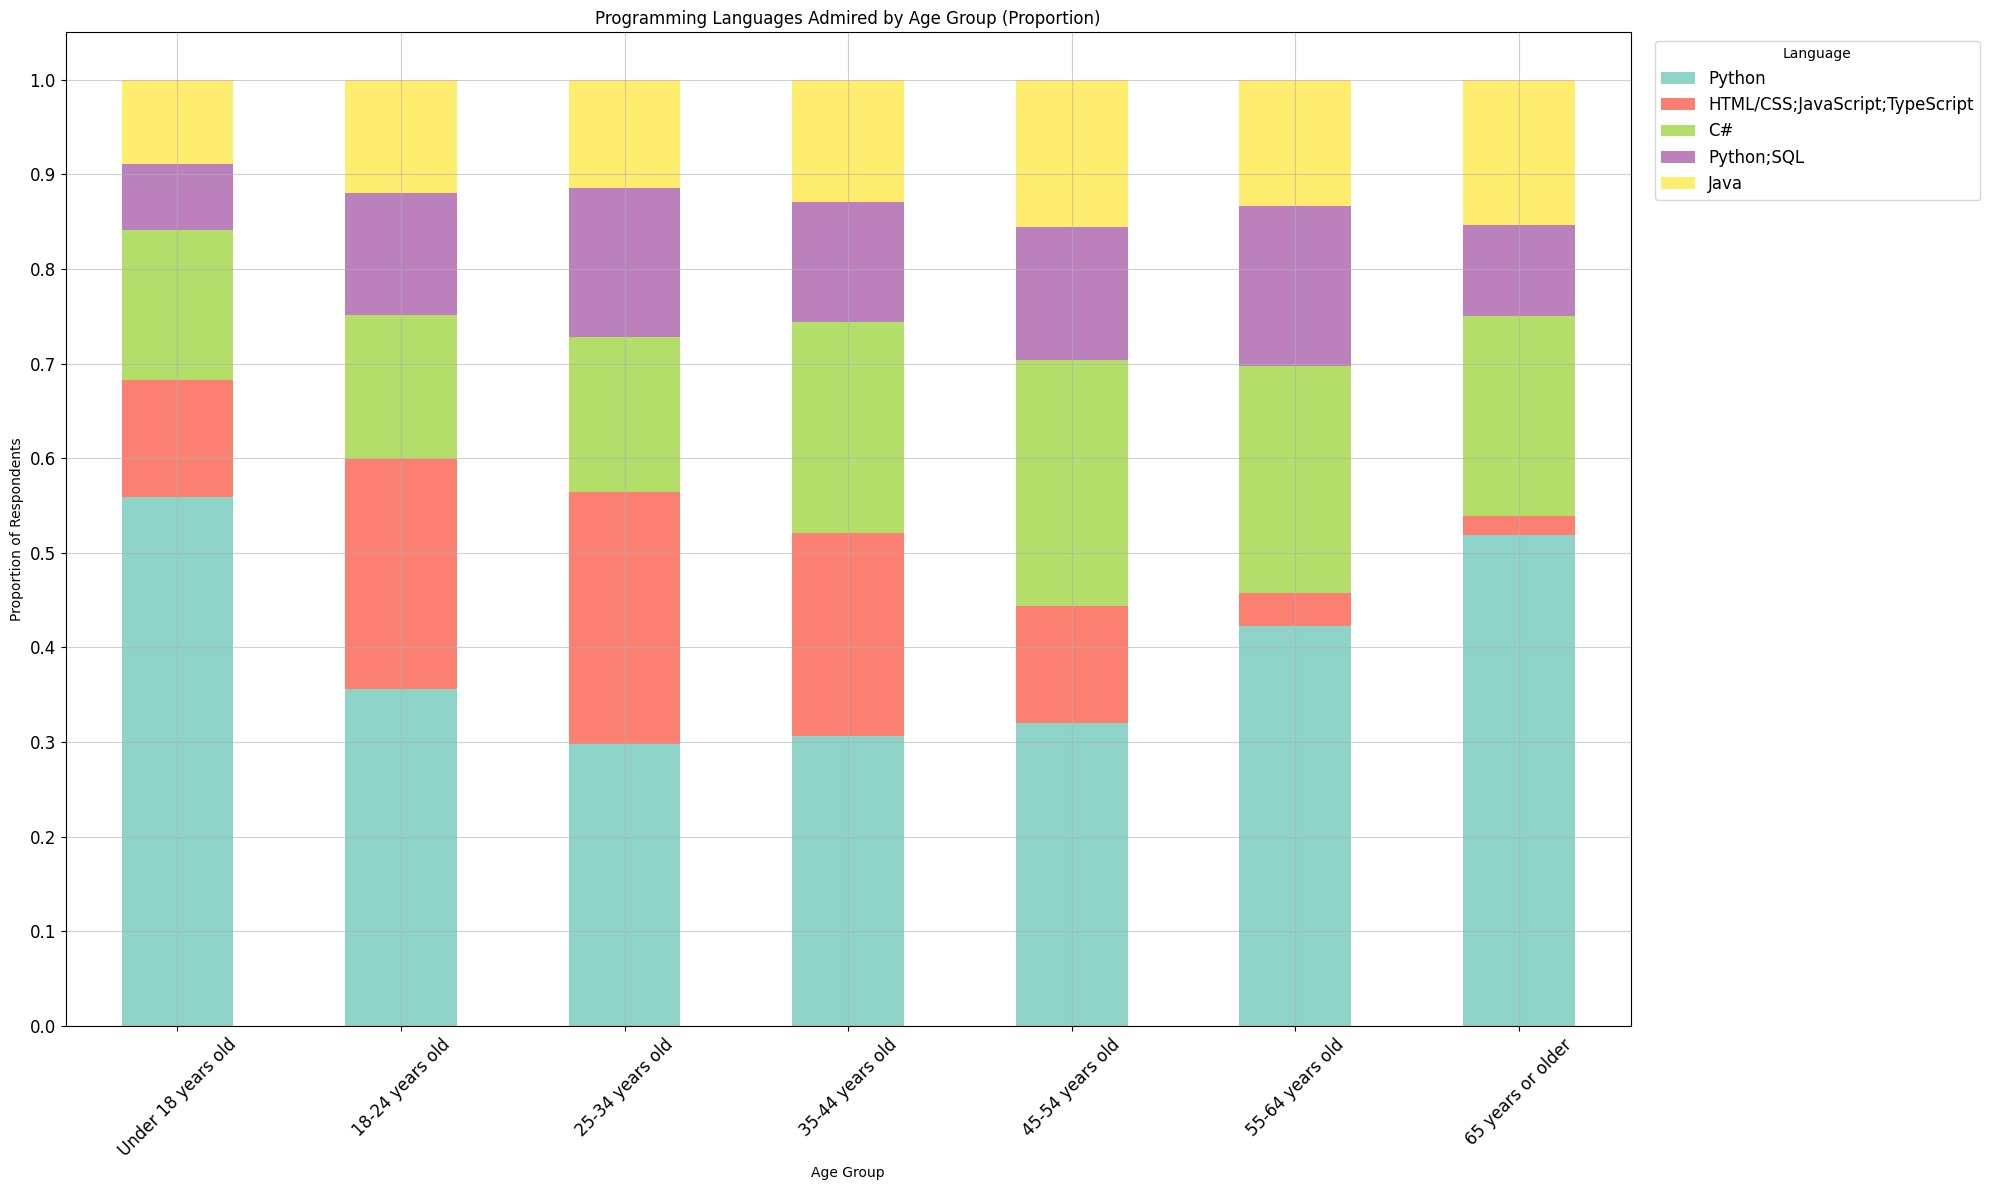

In [39]:
# 1. Drop missing values
df_lang = df[['Age', 'LanguageAdmired']].dropna()

# 2. Ensure age groups are ordered
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_lang['Age'] = pd.Categorical(df_lang['Age'], categories=age_order, ordered=True)

# 3. Split multiple admired languages into separate rows
df_expanded = df_lang.assign(Language=df_lang['LanguageAdmired'].str.split(',')).explode('Language')
df_expanded['Language'] = df_expanded['Language'].str.strip()

# Count language admiration per age group
lang_counts = pd.crosstab(df_expanded['Age'], df_expanded['Language'])

top_languages = df_expanded['Language'].value_counts().nlargest(5).index
lang_counts_top = lang_counts[top_languages]

# 5. Normalize per age group to get proportions
lang_props = lang_counts_top.div(lang_counts_top.sum(axis=1), axis=0)

# Plot
lang_props.plot(kind='bar', stacked=True, figsize=(20, 12), colormap='Set3', fontsize=12)

plt.title('Programming Languages Admired by Age Group (Proportion)')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(True, alpha=0.6)
plt.legend(title='Language', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=15)
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


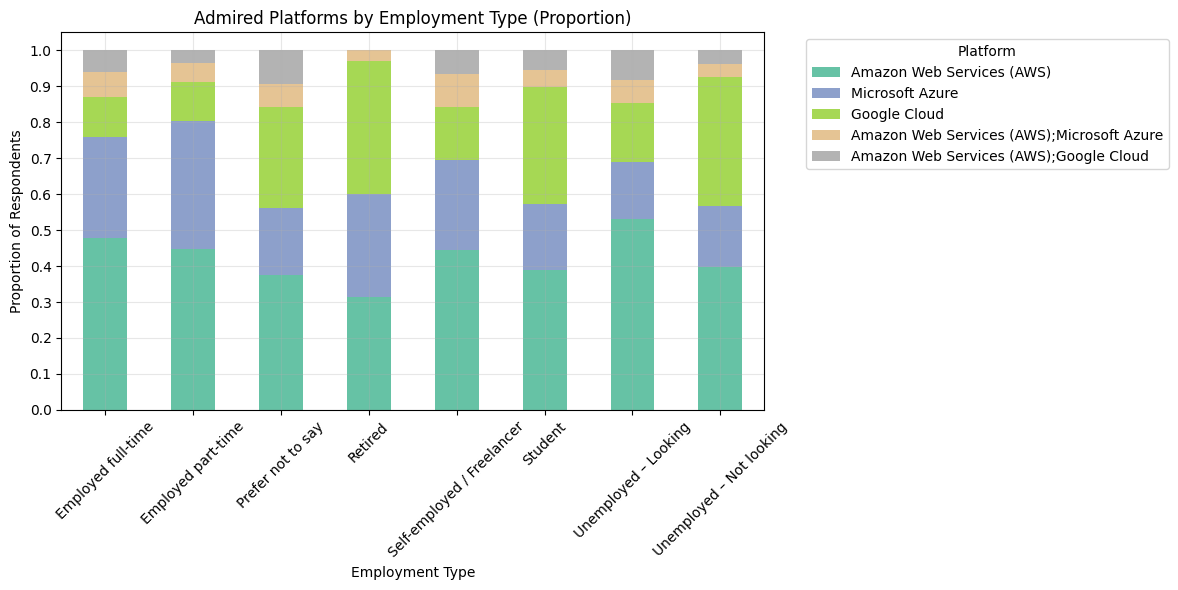

In [31]:
#Drop missing values
df_platform = df[['Employment_Simple', 'PlatformAdmired']].dropna()

# 2. Expand comma-separated platform list into multiple rows
df_expanded = df_platform.assign(Platform=df_platform['PlatformAdmired'].str.split(',')).explode('Platform')
df_expanded['Platform'] = df_expanded['Platform'].str.strip()

# 3. Create a cross-tab: platforms vs employment types
platform_counts = pd.crosstab(df_expanded['Employment_Simple'], df_expanded['Platform'])

#top most admired platforms
top_platforms = df_expanded['Platform'].value_counts().nlargest(5).index
platform_counts_top = platform_counts[top_platforms]

# Normalize row-wise (to proportions within employment type)
platform_props = platform_counts_top.div(platform_counts_top.sum(axis=1), axis=0)

# Plot
platform_props.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Admired Platforms by Employment Type (Proportion)')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Respondents')
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xticks(rotation=45)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
